<a href="https://colab.research.google.com/github/ArtyomHov/tensorflow-zero-to-mastery/blob/master/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few typs of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating a data to view and fit

In [9]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42
)

In [10]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [11]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Our data is a little hard to understand right now... let's visualize it.

In [12]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


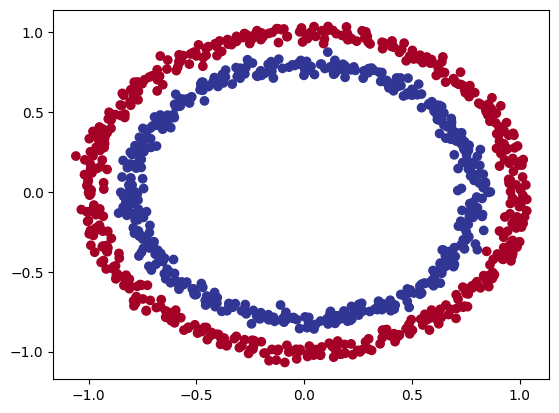

In [13]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu)

## Input and output shapes

In [14]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [17]:
# How many samples we are working with
len(X), len(y)

(1000, 1000)

In [18]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with Tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [21]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 9ms/step - loss: 3.6547 - accuracy: 0.4990
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 1.0922 - accuracy: 0.4660
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7100 - accuracy: 0.4830
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.4880
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4860


In [23]:
# Let's try and improve our model training longer
model_1.fit(X, y, epochs = 200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

#### Since we are working on a binary classification problem and our model is getting around 50% percent accuracy... it's performing as it's gueassing.

So let's step thinga up a notch and add an extra layer

In [26]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs = 100, verbose=0)

In [27]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932901740074158, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might add more layers or increase hidden units within a layer
2. Compiling the model - here we might to choose a different optimization function such as Adam instead of SGD
3. Fitting the model - perhaps we might fit our model for more epochs (leave it training for longer).

In [31]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time with 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [33]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.5110


[0.6983856558799744, 0.5109999775886536]

In [32]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               300       
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


To visualize our model predictions let's create a function `plot_decision_boundary()`, this function will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as line between zones (where each unique class falls).

In [39]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots decision bundary created by a model predicting on X.
  """
  # Define the axes bundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - -0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max),
                       np.linspace(y_min, y_max))

  # Create X values (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classificarion")
    # We have to reshape our prediction to get ready them for plotting
    y_pred =  np.argmax(y_pred, axis = 1).rehape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

79/79 [==============================] - 0s 2ms/step
doing binary classification


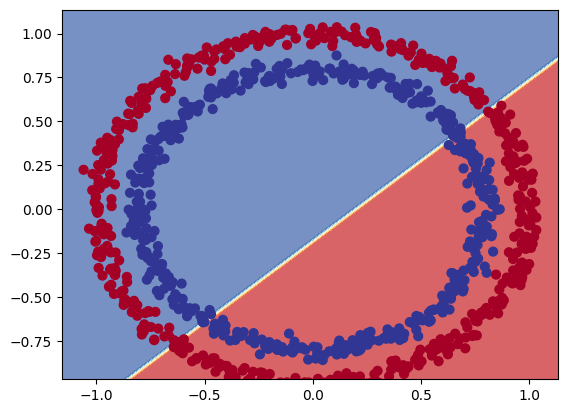

In [40]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [46]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(1, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

Oh wait... we compiled our model for a binary classification problem.

But we are now working on a regression problem. Let's change the model to suit our data.

In [47]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 471.0975 - mae: 471.0975
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 370.1041 - mae: 370.1041
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 273.7381 - mae: 273.7381
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 173.7183 - mae: 173.7183
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 72.0160 - mae: 72.0160
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 66.2868 - mae: 66.2868
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 79.3459 - mae: 79.3459
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 56.3764 - mae: 56.3764
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 44.6900 - mae: 44.6900
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 49.6248 - mae: 49.6248
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 10ms/step


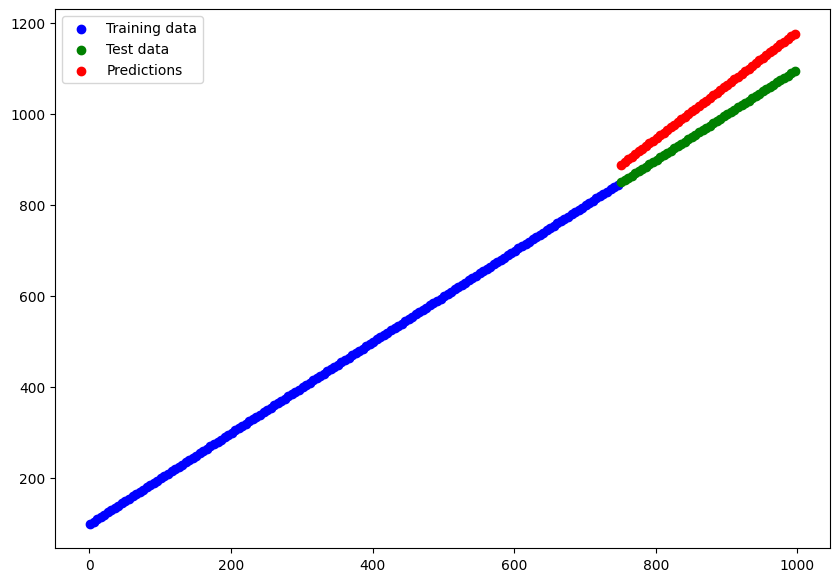

In [48]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the models predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label = 'Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label = 'Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label = 'Predictions')
plt.legend()

## The missing pace: Non-linearity